##종속변수 wine 의 type 을 one-hot vector 안시키고 

In [ ]:
#import 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [ ]:
#data_load
red = pd.read_csv('/content/winequality-red.csv',sep = ',')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')

display(red)
display(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#data type 추가 
red['type'] = 0
white['type'] = 1



#data concat 
wine = pd.concat([red,white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
#data shuffle 
wine_shuffle = wine.sample(frac=1)
wine_shuffle

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3693,6.8,0.31,0.30,8.00,0.028,33.0,122.0,0.99164,3.13,0.63,12.6,7,1
378,5.7,0.32,0.50,2.60,0.049,17.0,155.0,0.99270,3.22,0.64,10.0,6,1
4201,6.7,0.41,0.27,2.60,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,6,1
3056,6.9,0.28,0.41,1.40,0.016,6.0,55.0,0.98876,3.16,0.40,13.4,5,1
2103,6.0,0.27,0.15,1.50,0.056,35.0,128.0,0.99360,3.12,0.45,8.8,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,6.4,0.33,0.28,4.00,0.040,24.0,81.0,0.99030,3.26,0.64,12.6,7,1
508,5.9,0.62,0.28,3.50,0.039,55.0,152.0,0.99070,3.44,0.44,12.0,6,1
2371,6.2,0.45,0.73,7.20,0.099,47.0,202.0,0.99582,3.21,0.43,9.2,5,1
236,7.2,0.23,0.38,14.30,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,6,1


In [ ]:
#numpy 변환 
wine_np  = wine_shuffle.to_numpy()

In [ ]:
wine_np.shape

(6497, 13)

In [ ]:
#train_test_indexing 
train_ratio = 0.8

train_test_index = int(train_ratio * wine_np.shape[0])
print(train_test_index)

5197


In [ ]:
#train_test_split = 원핫 백터 적용 안한 채로  split 
train_x,train_y = wine_np[:train_test_index , :-1] , wine_np[:train_test_index,-1:] 
test_x,test_y = wine_np[train_test_index: , :-1],wine_np[train_test_index:,-1:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [ ]:
#model 구축
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48,activation = 'swish',input_shape = (12,)),
                             tf.keras.layers.Dense(units = 24 ,activation = 'swish'),
                             tf.keras.layers.Dense(units = 12 , activation = 'swish'),
                             tf.keras.layers.Dense(units = 1,activation = 'sigmoid')
])


In [ ]:
#model 최적화 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])


In [ ]:
#model 학습 
history = model.fit(train_x,train_y,epochs=25 , batch_size=36,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=3))

Epoch 1/25
116/116 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.8232 - val_loss: 0.2838 - val_accuracy: 0.8856
Epoch 2/25
116/116 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9067 - val_loss: 0.2312 - val_accuracy: 0.9317
Epoch 3/25
116/116 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9261 - val_loss: 0.1980 - val_accuracy: 0.9394
Epoch 4/25
116/116 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.9310 - val_loss: 0.1870 - val_accuracy: 0.9404
Epoch 5/25
116/116 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9312 - val_loss: 0.1810 - val_accuracy: 0.9423
Epoch 6/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9326 - val_loss: 0.1771 - val_accuracy: 0.9423
Epoch 7/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9329 - val_loss: 0.1745 - val_accuracy: 0.9442
Epoch 

In [ ]:
#model 평가 
model.evaluate(test_x,test_y)

41/41 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9523


[0.135386124253273, 0.9523077011108398]

In [ ]:
#model 예측 
pred_y = model.predict(test_x)

In [ ]:
np.round(pred_y)
'''
가장 중요시 해야 될 부분은 
바로 종속 데이터 비율이 가장 중요하다 
데이터 를 셔플 하면서 train 이나 test 쪽으로 하나의 종류의 데이터 가 편향 되면 당연히 문제가 된다. -> 정확도가 상승하는 문제 

이를 해결하기 위해 3가지 의 수치 인 
재현율 정밀도 F1 score 가 있다. 
'''

'\n가장 중요시 해야 될 부분은 \n바로 종속 데이터 비율이 가장 중요하다 \n데이터 를 셔플 하면서 train 이나 test 쪽으로 하나의 종류의 데이터 가 편향 되면 당연히 문제가 된다. -> 정확도가 상승하는 문제 \n\n이를 해결하기 위해 3가지 의 수치 인 \n재현율 정밀도 F1 score 가 있다. \n'

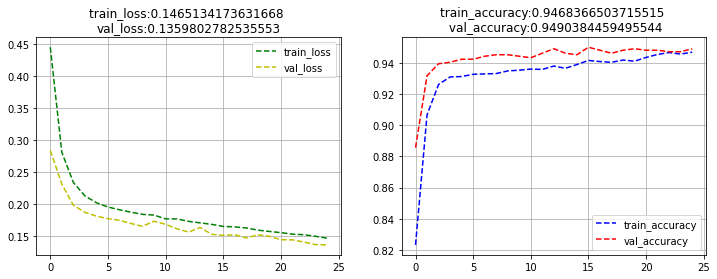

In [ ]:
#시각화 
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'],'g--',label = 'train_loss')
plt.plot(history.history['val_loss'],'y--',label = 'val_loss')
plt.legend()
plt.grid()
plt.title('train_loss:{} \nval_loss:{}'.format(history.history['loss'][-1],history.history['val_loss'][-1]))

plt.subplot(1,2,2)

plt.plot(history.history['accuracy'],'b--',label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],'r--',label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title('train_accuracy:{} \n val_accuracy:{}'.format(history.history['accuracy'][-1] , history.history['val_accuracy'][-1]))

plt.show()